In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [37]:
data = pd.read_csv('iris.data',sep=',',header=None)

In [38]:
column_names = ['sepal_length','sepal_width','petal_height','petal_width','class']
data.columns = column_names

In [39]:
data.to_csv('iris_csv.csv',index=False)

In [40]:
data = pd.read_csv('iris_csv.csv')

In [41]:
print(data.head())

   sepal_length  sepal_width  petal_height  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [42]:
data.describe()

,sepal_length,sepal_width,petal_height,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
SLS = data['sepal_length'][data['class'] == 'Iris-setosa']
SWS = data['sepal_width'][data['class'] == 'Iris-setosa']

SLVC = data['sepal_length'][data['class'] == 'Iris-versicolor']
SWVC = data['sepal_width'][data['class'] == 'Iris-versicolor']

SLVG = data['sepal_length'][data['class'] == 'Iris-virginica']
SWVG = data['sepal_width'][data['class'] == 'Iris-virginica']

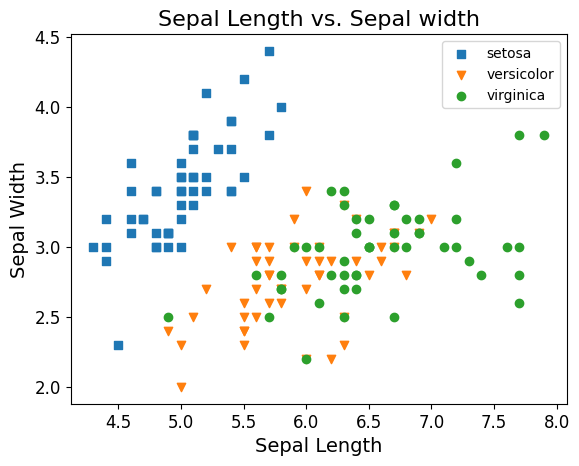

In [44]:
plt.title('Sepal Length vs. Sepal width',fontsize=16)
plt.scatter(SLS,SWS, label='setosa', marker='s')
plt.scatter(SLVC,SWVC, label='versicolor', marker='v')
plt.scatter(SLVG,SWVG, label='virginica', marker='o')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.legend()
plt.show()

c:\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


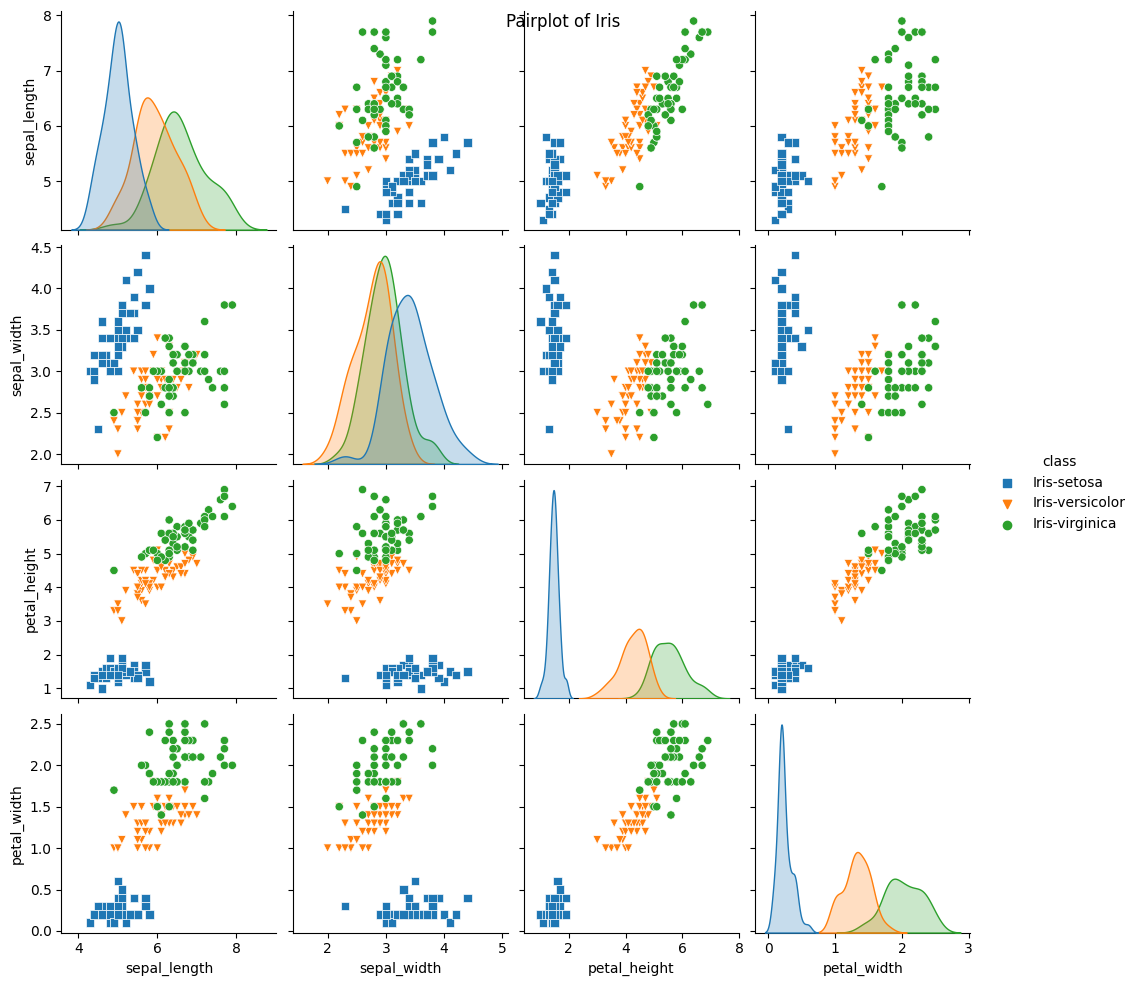

In [45]:
sns.pairplot(data,hue='class',markers=['s','v','o'])
plt.suptitle('Pairplot of Iris')
plt.show()

In [46]:
data_values = data.values
A = data_values[:,0:4]
B = data_values[:,4]
print(A)
print(B)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [47]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.5)
print(A_test)

[[6.7 3.0 5.0 1.7]
 [4.3 3.0 1.1 0.1]
 [5.5 2.3 4.0 1.3]
 [5.5 3.5 1.3 0.2]
 [5.0 3.3 1.4 0.2]
 [6.0 2.7 5.1 1.6]
 [4.6 3.2 1.4 0.2]
 [6.3 2.5 4.9 1.5]
 [5.0 3.5 1.3 0.3]
 [7.2 3.6 6.1 2.5]
 [6.2 2.8 4.8 1.8]
 [7.6 3.0 6.6 2.1]
 [5.1 3.4 1.5 0.2]
 [6.0 3.0 4.8 1.8]
 [5.3 3.7 1.5 0.2]
 [6.1 2.8 4.0 1.3]
 [6.4 3.2 4.5 1.5]
 [5.4 3.4 1.7 0.2]
 [5.8 2.6 4.0 1.2]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [7.4 2.8 6.1 1.9]
 [4.4 3.2 1.3 0.2]
 [6.3 3.4 5.6 2.4]
 [4.4 3.0 1.3 0.2]
 [5.5 2.6 4.4 1.2]
 [6.8 3.0 5.5 2.1]
 [6.8 2.8 4.8 1.4]
 [6.9 3.2 5.7 2.3]
 [5.1 2.5 3.0 1.1]
 [7.2 3.2 6.0 1.8]
 [5.1 3.8 1.9 0.4]
 [5.0 3.5 1.6 0.6]
 [5.4 3.9 1.3 0.4]
 [6.1 3.0 4.6 1.4]
 [6.3 3.3 6.0 2.5]
 [6.6 3.0 4.4 1.4]
 [5.9 3.0 5.1 1.8]
 [4.9 3.0 1.4 0.2]
 [7.1 3.0 5.9 2.1]
 [6.5 3.0 5.8 2.2]
 [4.8 3.0 1.4 0.1]
 [5.2 2.7 3.9 1.4]
 [5.9 3.0 4.2 1.5]
 [7.0 3.2 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [5.0 2.0 3.5 1.0]
 [4.7 3.2 1.3 0.2]
 [5.0 3.0 1.6 0.2]
 [6.9 3.1 5.4 2.1]
 [4.8 3.0 1.4 0.3]
 [6.1 3.0 4.9 1.8]
 [5.8 4.0 1.

In [48]:
m_svc = SVC()
m_svc.fit(A_train,B_train)

SVC()

In [49]:
predict = m_svc.predict(A_test)
accuracy = accuracy_score(B_test, predict)
c_matrix = confusion_matrix(B_test, predict)
class_rep = classification_report(B_test, predict)
print("Accuracy in Percentage")
print(accuracy*100)
print("Confusion Matrix")
print(c_matrix)
print("Classification Report")
print(class_rep) 
for i in range(len(predict)):
    print(B_test[i],predict[i])  


Accuracy in Percentage
93.33333333333333
Confusion Matrix
[[27  0  0]
 [ 0 22  5]
 [ 0  0 21]]
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        27
Iris-versicolor       1.00      0.81      0.90        27
 Iris-virginica       0.81      1.00      0.89        21

       accuracy                           0.93        75
      macro avg       0.94      0.94      0.93        75
   weighted avg       0.95      0.93      0.93        75

Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris

In [50]:
mod_LR = LogisticRegression()
mod_LR.fit(A_train,B_train)

LogisticRegression()

In [51]:
predict2 = mod_LR.predict(A_test)
accuracy2 = accuracy_score(B_test, predict2)
c_matrix2 = confusion_matrix(B_test, predict2)
class_rep2 = classification_report(B_test, predict2)
print("Accuracy in Percentage")
print(accuracy2*100)
print("Confusion Matrix")
print(c_matrix2)
print("Classification Report")
print(class_rep2) 
for i in range(len(predict2)):
    print(B_test[i],predict2[i])  


Accuracy in Percentage
94.66666666666667
Confusion Matrix
[[27  0  0]
 [ 0 23  4]
 [ 0  0 21]]
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        27
Iris-versicolor       1.00      0.85      0.92        27
 Iris-virginica       0.84      1.00      0.91        21

       accuracy                           0.95        75
      macro avg       0.95      0.95      0.94        75
   weighted avg       0.96      0.95      0.95        75

Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris

In [52]:
A_new = np.array([[3,2,1,0.2],[4.9, 2.2, 3.8, 1.1],[6.7, 2.5, 5.9, 2.9]])
predict3 = m_svc.predict(A_new)
print("Predcition of class: {}".format(predict3))

Predcition of class: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [54]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(A_train, B_train)

SVC(kernel='linear', random_state=0)

In [55]:
B_pred = classifier.predict(A_test)
print(np.concatenate((B_pred.reshape(len(B_pred),1), B_test.reshape(len(B_test),1)),1))

[['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virgi